Importing Packages required


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
399,3,193,70,31,0,34.9,0.241,25,1
489,8,194,80,0,0,26.1,0.551,67,0
456,1,135,54,0,0,26.7,0.687,62,0
700,2,122,76,27,200,35.9,0.483,26,0
762,9,89,62,0,0,22.5,0.142,33,0
614,11,138,74,26,144,36.1,0.557,50,1
683,4,125,80,0,0,32.3,0.536,27,1


In [7]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All values are present

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Defining function to give upper and lower bond for data

In [12]:
def IQR_limit(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return max(0,Q1-1.5*IQR),Q3+1.5*IQR

1. Pregnancies

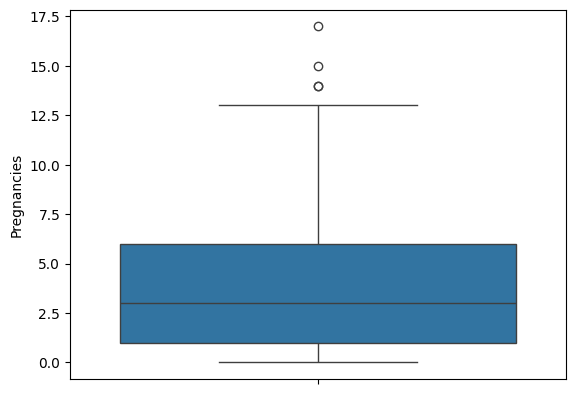

In [10]:
sns.boxplot(df['Pregnancies'])
plt.show()

In [13]:
IQR_limit(df,'Pregnancies')

(0, np.float64(13.5))

In [16]:
df = df[df['Pregnancies'] <= 13]

2. Glucose	(50-200)

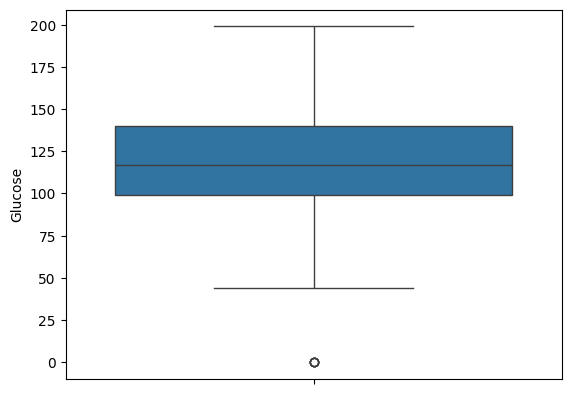

In [17]:
sns.boxplot(df['Glucose'])
plt.show()

In [18]:
IQR_limit(df,'Glucose')

(np.float64(37.5), np.float64(201.5))

In [22]:
df = df[df['Glucose']> 40]

3. BloodPressure (50-200) mmHG

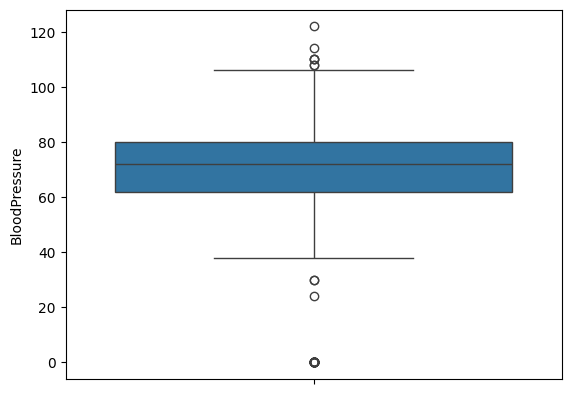

In [20]:
sns.boxplot(df['BloodPressure'])
plt.show()

In [21]:
IQR_limit(df,'BloodPressure')

(np.float64(35.0), np.float64(107.0))

In [23]:
df = df[df['BloodPressure'] > 35]

4. SkinThickness (0 – 99) mm

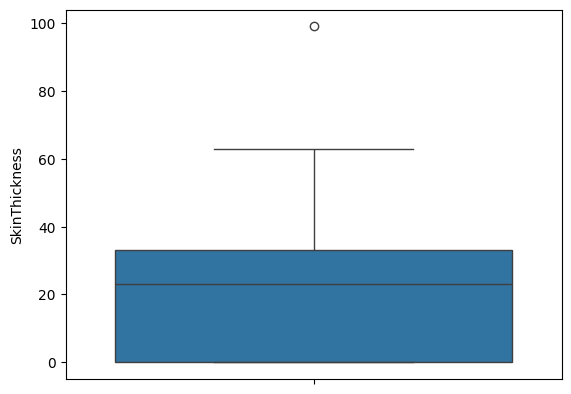

In [24]:
sns.boxplot(df['SkinThickness'])
plt.show()

In [25]:
IQR_limit(df,'SkinThickness')

(0, np.float64(82.5))

In [26]:
df = df[df['SkinThickness'] < 82]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    int64  
 4   Insulin                   720 non-null    int64  
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.2 KB


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.815278,121.768056,72.637500,21.173611,84.233333,32.218333,0.477081,33.326389,0.338889
std,3.270901,30.545214,12.107791,15.490645,117.293759,7.243133,0.335885,11.828297,0.473661
min,0.000000,44.000000,38.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,47.000000,32.050000,0.379000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.500000,36.500000,0.632500,41.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


5. Insulin (0 – 900) μU/mL

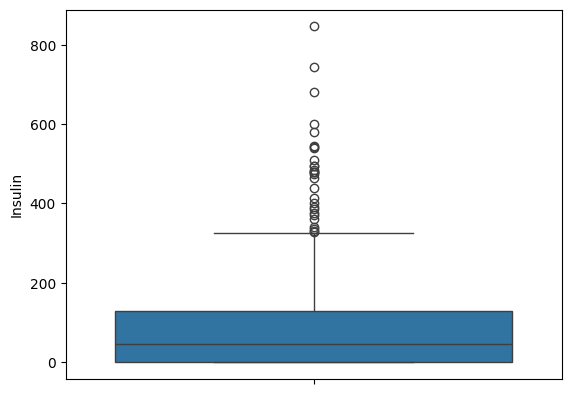

In [27]:
sns.boxplot(df['Insulin'])
plt.show()

In [43]:
# Filter rows where Insulin is greater than 400
insulin_gt_400 = df[df['Insulin'] > 400]

# Display the filtered rows
insulin_gt_400


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0
286,5,155,84,44,545,38.7,0.619,34,0


It is clearly visible that => higher the Insulin , Higher the chance of being Biabetes

Note : There are many values of many rows belonging to col 'SkinThickness',	'Insulin'	are '0', which is unusal .
Ideally SkinThickness is from (0.3 mm to 1 cm) , where Insulin for normal person is around 10 - upto 25

6. BMI (10 - 70)

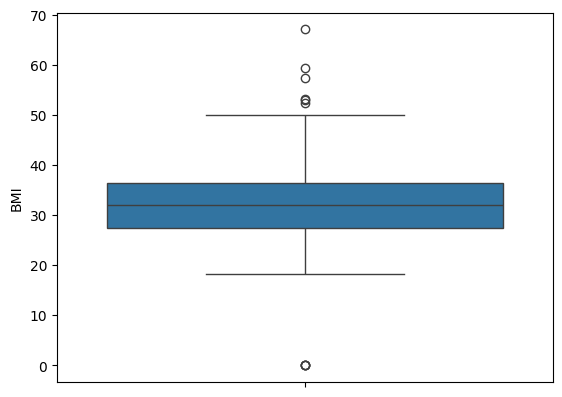

In [44]:
sns.boxplot(df['BMI'])
plt.show()

In [45]:
IQR_limit(df,'BMI')

(np.float64(13.749999999999996), np.float64(50.150000000000006))

In [46]:
df = df[df['BMI'] > 14]

In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.818436,121.776536,72.600559,21.227654,84.579609,32.398324,0.475311,33.282123,0.339385
std,3.269780,30.616423,12.100382,15.493102,117.494130,6.849593,0.333338,11.742518,0.473832
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.500000,48.000000,32.250000,0.378000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,33.000000,132.000000,36.525000,0.629500,41.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


7. DiabetesPedigreeFunction ( 0- 2.5) => In limit

# Scaling values

In [49]:
scaler = StandardScaler()
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']
X_scaled = scaler.fit_transform(X)
X = X_scaled

# Train-Test-Split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(716, 8) (572, 8) (144, 8)


# Applying SVM Model on X_train and y_train

In [53]:
model = svm.SVC(kernel='linear')

In [54]:
model.fit(X_train, Y_train) # Training model

SVC(kernel='linear')

# Model Evaluation

1. Traing Data

In [56]:
preadicted_Train = model.predict(X_train)

In [57]:
Score = accuracy_score(preadicted_Train, Y_train)

In [59]:
print('Accuracy Score of the training data : ', Score)

Accuracy Score of the training data :  0.791958041958042


2. Test Data

In [60]:
preadicted_Test = model.predict(X_test)

In [61]:
Test_score = accuracy_score(preadicted_Test, Y_test)

In [62]:
print('Accuracy Score of the test data : ', Test_score)

Accuracy Score of the test data :  0.7361111111111112


# => Here for this small amount of data we got train score (=79%) and test score (=74%) . Also as there is very small difference between this score there is no overfitting of data.

# Creating function to predict

In [63]:
def predict_diabetes(input_data):
  # Reshaping the input data to be a 2D array (required for prediction).
  input_data_as_numpy_array = np.asarray(input_data)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

  # Standardize the input data using the same scaler used for training.
  Standardized_data = scaler.transform(input_data_reshaped)

  # Make a prediction
  prediction = model.predict(Standardized_data )
  print(prediction)

  if (prediction[0] == 0):
    print('The person is not diabetic')
  else:
    print('The person is diabetic')

Example

In [ ]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
predict_diabetes(input_data)